# Creating Baseline Dummy Model

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

2023-12-04 15:52:09.012933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading datasets

In [2]:
truth = pd.read_csv('../raw_data/True.csv')
fake = pd.read_csv('../raw_data/Fake.csv')

## Cleaning Data

In [3]:
# Dropping unnecessary columns

truth = truth.drop(columns=['title', 'subject', 'date'])
fake = fake.drop(columns=['title', 'subject', 'date'])

In [4]:
# Creating 'isfake' column (0 = truth, 1 = fake)

truth['isfake'] = 0
fake['isfake'] = 1

In [5]:
# Concatenating both df's

news = pd.concat([truth, fake], axis=0, ignore_index=True)
news

,text,isfake
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...
44893,21st Century Wire says As 21WIRE reported earl...,1
44894,21st Century Wire says It s a familiar theme. ...,1
44895,Patrick Henningsen 21st Century WireRemember ...,1
44896,21st Century Wire says Al Jazeera America will...,1


## Preprocessing Data

In [6]:
# ID features and target

X = news.text
y = news.isfake

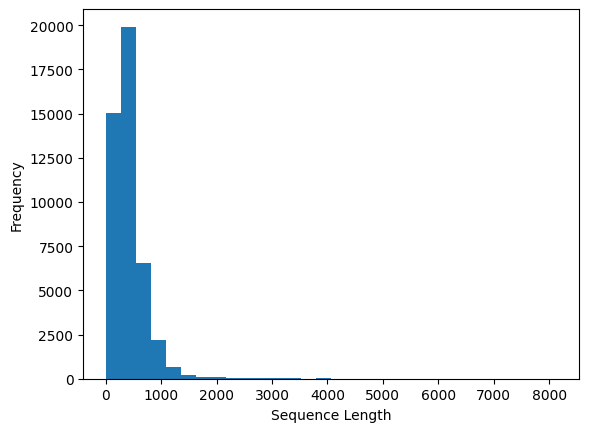

In [7]:
# Explore the distribution of sequence lengths in your dataset

sequence_lengths = [len(sequence.split()) for sequence in news['text']]
plt.hist(sequence_lengths, bins=30)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Split into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# --------------------------- # 

# Tokenize and pad the text data

max_words = 10000  
max_sequence_length = 500  

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

## Build Model

In [16]:
# --------------------------- # 

# Define the RNN model
embedding_dim = 50 

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# --------------------------- # 

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  
batch_size = 32 

model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)

Epoch 1/5
898/898 [==============================] - 127s 138ms/step - loss: 0.1532 - accuracy: 0.9607 - val_loss: 0.0656 - val_accuracy: 0.9819
Epoch 2/5
898/898 [==============================] - 123s 137ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0748 - val_accuracy: 0.9737
Epoch 3/5
898/898 [==============================] - 125s 139ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0578 - val_accuracy: 0.9837
Epoch 4/5
898/898 [==============================] - 126s 141ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0585 - val_accuracy: 0.9840
Epoch 5/5
281/281 [==============================] - 7s 26ms/step - loss: 0.0672 - accuracy: 0.9832


Epoch 1/5
898/898 [==============================] - 143s 159ms/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0571 - val_accuracy: 0.9869
Epoch 2/5
898/898 [==============================] - 129s 143ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0799 - val_accuracy: 0.9811
Epoch 3/5
898/898 [==============================] - 130s 144ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0654 - val_accuracy: 0.9862
Epoch 4/5
898/898 [==============================] - 129s 144ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0543 - val_accuracy: 0.9875
Epoch 5/5
898/898 [==============================] - 131s 146ms/step - loss: 0.0139 - accuracy: 0.9967 - val_loss: 0.0564 - val_accuracy: 0.9868


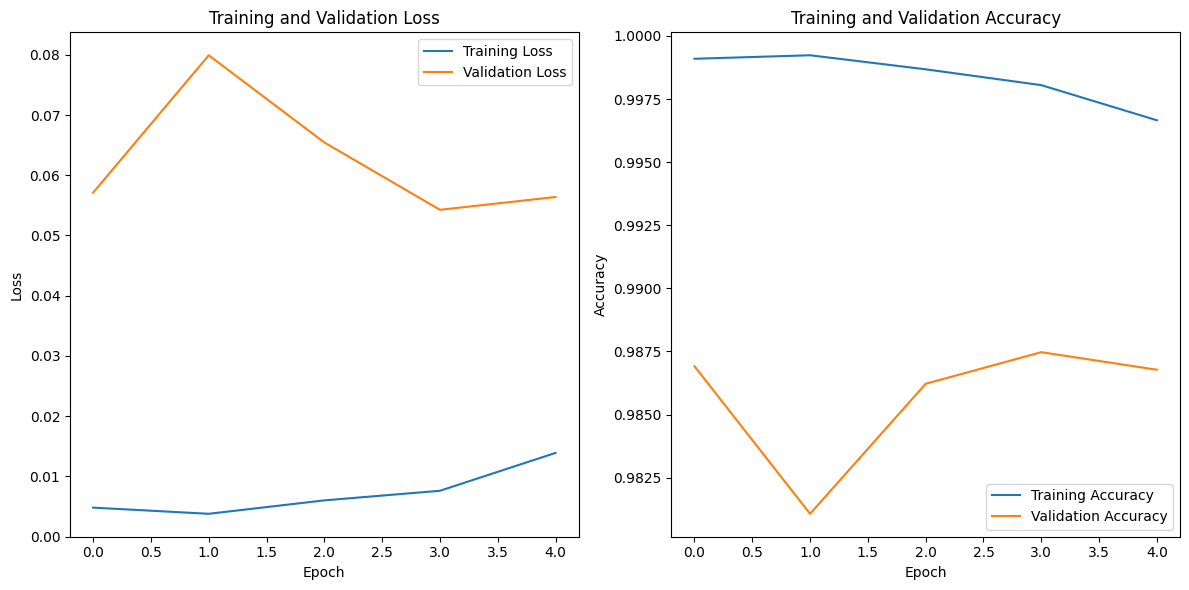

In [18]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import History

# Train the model and keep track of history
history = History()
model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[history])

# Plotting the learning curve
def plot_learning_curve(history):
    # Extract training and validation loss and accuracy from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plotting training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

# Plot the learning curve
plot_learning_curve(history)